In [5]:
# 1. Carregar dados + 
import sys
sys.path.append('..')  # Adiciona o diretório pai
from src.utils.io.io_local import *
from src.utils.io.io_clearml import *

from src.utils.io import load_dataframe
from config import config_custom as config
from src.pipelines.pipeline_processamento import executar_pipeline_processamento
from src.pipelines.pipeline_treinamento import treinar_pipeline_completo 
from src.pipelines.pipeline_features import executar_pipeline_features

df_raw = load_dataframe('../dados/2025.05.14_thermal_confort_santa_maria_brazil_.csv')
print(f'Dados brutos: {df_raw.shape}')

Dados brutos: (1720, 40)


# Pipelines

## Pipeline processamento

In [6]:
# 1. Carregar dados + # 2. PROCESSAMENTO (Limpeza + Imputação)
df_raw = load_dataframe('../dados/2025.05.14_thermal_confort_santa_maria_brazil_.csv')
print(f'Dados brutos: {df_raw.shape}')

# 2. PROCESSAMENTO (Limpeza + Imputação)
df_proc = executar_pipeline_processamento(
    df_raw,
    config_imputacao_customizada=config.CONFIG_IMPUTACAO_CUSTOMIZADA,
    criar_agrupamento_temporal=True,
    nome_coluna_agrupamento='mes-ano'
)
print(f'Após processamento: {df_proc.shape}')
print(f'NAs restantes: {df_proc.isna().sum().sum()}')

Dados brutos: (1720, 40)
🔄 Iniciando pipeline de processamento BASE...
  1️⃣ Aplicando substituições de limpeza...
  2️⃣ Convertendo tipos de dados...
  3️⃣ Imputando valores faltantes...
  4️⃣ Criando agrupamento temporal...
✅ Pipeline BASE concluído! Shape final: (1720, 41)
Após processamento: (1720, 41)
NAs restantes: 0


## Pipeline features

In [ ]:
# 3. FEATURES (Codificação + Derivadas + Normalização)
df_feat, artefatos = executar_pipeline_features(
    df_proc,
    # Codificação
    aplicar_codificacao=True,
    metodo_codificacao='label',           # 'label' ou 'onehot'
    sufixo_codificacao='_cod',
    
    # Features derivadas
    criar_features_derivadas=True,
    tipos_features_derivadas=[
        'imc',                            # Índice de Massa Corporal
        'imc_classe',                     # Classe do IMC
        'heat_index',                     # Índice de calor
        'dew_point',                      # Ponto de orvalho
        't*u',                            # Temperatura × Umidade
    ],
    
    # Normalização
    aplicar_normalizacao=True,
    metodo_normalizacao='standard',       # 'standard', 'minmax', 'robust'
    agrupamento_normalizacao='mes-ano',   # Normalizar por grupo
    sufixo_normalizacao='_norm',
)

print(f'Após features: {df_feat.shape}')
print(f'Artefatos criados: {list(artefatos.keys())}')
df_feat.to_csv("../data/resultados/dados_processados_novas_features.csv")
# Visualizar resultado
df_feat.head()


🎨 Iniciando pipeline de FEATURES...
  1️⃣ Criando features derivadas (5 tipos)...
  2️⃣ Aplicando codificação (label)...
  3️⃣ Aplicando normalização (standard)...
✅ Pipeline FEATURES concluído! Shape final: (1720, 78)
   Novas colunas criadas: 37
Após features: (1720, 78)
Artefatos criados: ['mapeamentos_codificacao', 'colunas_normalizadas']


,data,hora,idade,sexo,peso,altura,vestimenta,p1,p2,p3,...,vel_vento_norm,sd_dirvento_norm,vel_vento_max_norm,chuva_tot_norm,IMC_norm,heat_index_norm,dew_point_norm,t_u_norm,sexo_cod_norm,vestimenta_cod_norm
0,2015-08-05,09:10:00,51,f,77,163,"0,5",0,0,0,...,-1.100945,-1.500344,-1.063319,0.0,1.338207,2.157433,-0.837574,1.048451,-0.942160,-0.453888
1,2015-08-05,09:10:00,50,f,69,170,1,0,0,0,...,-1.100945,-1.500344,-1.063319,0.0,-0.141792,2.157433,-0.837574,1.048451,-0.942160,2.071971
2,2015-08-05,09:10:00,25,m,96,185,1,-1,0,-2,...,-1.100945,-1.500344,-1.063319,0.0,1.068200,2.157433,-0.837574,1.048451,1.061391,2.071971
3,2015-08-05,09:10:00,27,f,98,160,1,0,0,0,...,-1.100945,-1.500344,-1.063319,0.0,4.034041,2.157433,-0.837574,1.048451,-0.942160,2.071971
4,2015-08-05,09:10:00,35,f,56,167,1,1,0,-2,...,-1.100945,-1.500344,-1.063319,0.0,-1.242094,2.157433,-0.837574,1.048451,-0.942160,2.071971


In [8]:
artefatos


{'mapeamentos_codificacao': {'sexo': {0: 'f', 1: 'm'},
  'vestimenta': {0: '0,5',
   1: '1',
   2: '9,5',
   3: '0,4',
   4: '2',
   5: '-1',
   6: '0'}},
 'colunas_normalizadas': ['idade_norm',
  'peso_norm',
  'altura_norm',
  'p1_norm',
  'p2_norm',
  'p3_norm',
  'p4_norm',
  'p5_norm',
  'p6_norm',
  'p7_norm',
  'p8_norm',
  'tmedia_norm',
  'tmax_norm',
  'tmin_norm',
  'tu_norm',
  'ur_norm',
  'ur_max_norm',
  'ur_min_norm',
  'rsolarmed_norm',
  'rsolartot_norm',
  'vel_vento_norm',
  'sd_dirvento_norm',
  'vel_vento_max_norm',
  'chuva_tot_norm',
  'IMC_norm',
  'heat_index_norm',
  'dew_point_norm',
  't_u_norm',
  'sexo_cod_norm',
  'vestimenta_cod_norm']}

# Pipeline de treinamento

In [ ]:
from src.pipelines import treinar_pipeline_completo
from config.config_gerais import PARAMS_PADRAO

# Definir coluna alvo e features
coluna_alvo = 'p1'

# Usar apenas features principais para teste
features_treino = [
    'idade', 'sexo_cod', 'peso', 'altura',
    'tmedia', 'ur', 'vel_vento',
]

# Filtrar features que existem no DataFrame
features_existentes = [f for f in features_treino if f in df_feat.columns]
print(f"Features para treinamento: {features_existentes}")

# Preparar dados
df_treino = df_feat[features_existentes + [coluna_alvo]].dropna()
print(f"Dataset de treino: {df_treino.shape}")

# 4. TREINAMENTO
print("\n" + "="*60)
print("🤖 INICIANDO PIPELINE DE TREINAMENTO")
print("="*60)

resultado = treinar_pipeline_completo(
    dados=df_treino,
    coluna_alvo=coluna_alvo,
    params_setup=PARAMS_PADRAO,
    n_modelos_comparar=3,           # Testar top 3 modelos
    otimizar_hiperparametros=True,         # Otimizar hiperparâmetros
    n_iter_otimizacao=10,  # 10 iterações de otimização
    salvar_modelo_final=True,           # Salvar modelo
    nome_modelo="modelo_conforto_termico",
    pasta_modelos="modelos"
)

# Visualizar resultados
print("\n" + "="*60)
print("📊 RESULTADOS DO TREINAMENTO")
print("="*60)

# Nome do melhor modelo
nome_modelo = str(resultado['tabela_comparacao'].index[0])
print(f"\n✓ Melhor modelo: {nome_modelo}")

print(f"\n📈 Métricas principais:")
metricas = resultado['metricas_melhor']
for nome, valor in metricas.items():
    if isinstance(valor, (int, float)):
        print(f"  • {nome}: {valor:.4f}")

print(f"\n💾 Modelo salvo em: {resultado.get('caminho_modelo', 'N/A')}")

print("\n📋 Comparação de modelos (top 5 métricas):")
print(resultado['tabela_comparacao'].head())

2026-02-04 16:35:53,872 - INFO - ============================================================
2026-02-04 16:35:53,873 - INFO - Iniciando pipeline completo de treinamento
2026-02-04 16:35:53,873 - INFO - ============================================================
2026-02-04 16:35:53,873 - INFO - ETAPA 1: Configurando experimento PyCaret...
2026-02-04 16:35:53,873 - INFO - Configurando experimento de classificação...


Features para treinamento: ['idade', 'sexo_cod', 'peso', 'altura', 'tmedia', 'ur', 'vel_vento']
Dataset de treino: (1720, 8)

🤖 INICIANDO PIPELINE DE TREINAMENTO
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] S

2026-02-04 16:35:57,391 - INFO - ✓ Experimento configurado
2026-02-04 16:35:57,392 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:35:57,393 - INFO - Comparando modelos de classificação...


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Lig

2026-02-04 16:36:49,478 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:36:49,478 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:36:49,478 - INFO -   Melhor modelo: lr
2026-02-04 16:36:49,478 - INFO -   Accuracy: 0.4502
2026-02-04 16:36:49,478 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:36:49,478 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:36:58,839 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:36:58,840 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:36:58,841 - INFO -   Accuracy após otimização: 0.5104
2026-02-04 16:36:58,841 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:36:58,841 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:36:59,233 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:36:59,233 - INFO - ✓ Modelo finalizado
2026-02-04 16:36:59,233 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

📊 RESULTADOS DO TREINAMENTO

✓ Melhor modelo: lr

📈 Métricas principais:
  • Accuracy: 0.4502
  • AUC: 0.0000
  • Recall: 0.4502
  • Prec.: 0.4391
  • F1: 0.4216
  • Kappa: 0.2847
  • MCC: 0.2920
  • TT (Sec): 0.1720

💾 Modelo salvo em: modelos\modelo_conforto_termico.pkl

📋 Comparação de modelos (top 5 métricas):
                            Model  Accuracy     AUC  Recall   Prec.      F1  \
lr            Logistic Regression    0.4502  0.0000  0.4502  0.4391  0.4216   
gbc  Gradient Boosting Classifier    0.4385  0.0000  0.4385  0.4315  0.4316   
lda  Linear Discriminant Analysis    0.4219  0.0000  0.4219  0.4253  0.4074   
rf       Random Forest Classifier    0.4070  0.7347  0.4070  0.3986  0.3984   
ada          Ada Boost Classifier    0.4036  0.0000  0.4036  0.2720  0.3132   

      Kappa     MCC  TT (Sec)  
lr   0.2847  0.2920     0.172  
gbc  0.2793  0.2804     1.194  
lda  0.2681  0.2735     0.164  
rf   0.2363  0.2378     0.3

In [10]:
resultados_10_experimentos = {}
for i in range(10):
    print("\n" + "="*60)
    print(f"🤖 INICIANDO EXPERIMENTO {i+1}/10")
    print("="*60)
    
    resultado = treinar_pipeline_completo(
        dados=df_treino,
        coluna_alvo=coluna_alvo,
        params_setup=PARAMS_PADRAO,
        n_modelos_comparar=3,           # Testar top 3 modelos
        otimizar_hiperparametros=True,         # Otimizar hiperparâmetros
        n_iter_otimizacao=10,  # 10 iterações de otimização
        salvar_modelo_final=True,           # Salvar modelo
        nome_modelo=f"modelo_conforto_termico_exp_{i+1}",
        pasta_modelos="modelos"
    )
    
    resultados_10_experimentos[f'Experimento_{i+1}'] = resultado


2026-02-04 16:37:16,551 - INFO - ============================================================
2026-02-04 16:37:16,551 - INFO - Iniciando pipeline completo de treinamento
2026-02-04 16:37:16,552 - INFO - ============================================================
2026-02-04 16:37:16,552 - INFO - ETAPA 1: Configurando experimento PyCaret...
2026-02-04 16:37:16,553 - INFO - Configurando experimento de classificação...



🤖 INICIANDO EXPERIMENTO 1/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

2026-02-04 16:37:18,825 - INFO - ✓ Experimento configurado
2026-02-04 16:37:18,825 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:37:18,825 - INFO - Comparando modelos de classificação...


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

2026-02-04 16:38:08,738 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:38:08,744 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:38:08,744 - INFO -   Melhor modelo: lr
2026-02-04 16:38:08,744 - INFO -   Accuracy: 0.4560
2026-02-04 16:38:08,744 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:38:08,744 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:38:12,607 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:38:12,607 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:38:12,608 - INFO -   Accuracy após otimização: 0.4440
2026-02-04 16:38:12,608 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:38:12,609 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:38:13,009 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:38:13,009 - INFO - ✓ Modelo finalizado
2026-02-04 16:38:13,009 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 2/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:38:15,607 - INFO - ✓ Experimento configurado
2026-02-04 16:38:15,607 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:38:15,611 - INFO - Comparando modelos de classificação...


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

2026-02-04 16:39:07,394 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:39:07,411 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:39:07,411 - INFO -   Melhor modelo: lr
2026-02-04 16:39:07,411 - INFO -   Accuracy: 0.4535
2026-02-04 16:39:07,411 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:39:07,411 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:39:11,445 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:39:11,445 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:39:11,445 - INFO -   Accuracy após otimização: 0.4772
2026-02-04 16:39:11,445 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:39:11,445 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:39:11,840 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:39:11,840 - INFO - ✓ Modelo finalizado
2026-02-04 16:39:11,840 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 3/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:39:14,173 - INFO - ✓ Experimento configurado
2026-02-04 16:39:14,174 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:39:14,175 - INFO - Comparando modelos de classificação...


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

2026-02-04 16:40:05,214 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:40:05,214 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:40:05,214 - INFO -   Melhor modelo: lr
2026-02-04 16:40:05,214 - INFO -   Accuracy: 0.4601
2026-02-04 16:40:05,214 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:40:05,214 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:40:09,151 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:40:09,151 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:40:09,151 - INFO -   Accuracy após otimização: 0.5311
2026-02-04 16:40:09,151 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:40:09,151 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:40:09,596 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:40:09,596 - INFO - ✓ Modelo finalizado
2026-02-04 16:40:09,596 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 4/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:40:11,939 - INFO - ✓ Experimento configurado
2026-02-04 16:40:11,939 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:40:11,939 - INFO - Comparando modelos de classificação...


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Lig

2026-02-04 16:41:02,088 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:41:02,096 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:41:02,096 - INFO -   Melhor modelo: lr
2026-02-04 16:41:02,097 - INFO -   Accuracy: 0.4510
2026-02-04 16:41:02,097 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:41:02,098 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:41:05,867 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:41:05,868 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:41:05,868 - INFO -   Accuracy após otimização: 0.4772
2026-02-04 16:41:05,869 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:41:05,869 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:41:06,274 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:41:06,275 - INFO - ✓ Modelo finalizado
2026-02-04 16:41:06,275 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 5/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:41:08,547 - INFO - ✓ Experimento configurado
2026-02-04 16:41:08,547 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:41:08,547 - INFO - Comparando modelos de classificação...


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Lig

2026-02-04 16:42:02,754 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:42:02,759 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:42:02,759 - INFO -   Melhor modelo: lr
2026-02-04 16:42:02,760 - INFO -   Accuracy: 0.4468
2026-02-04 16:42:02,760 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:42:02,761 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:42:08,014 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:42:08,014 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:42:08,014 - INFO -   Accuracy após otimização: 0.4025
2026-02-04 16:42:08,014 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:42:08,014 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:42:08,481 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:42:08,481 - INFO - ✓ Modelo finalizado
2026-02-04 16:42:08,481 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 6/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:42:11,795 - INFO - ✓ Experimento configurado
2026-02-04 16:42:11,796 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:42:11,797 - INFO - Comparando modelos de classificação...


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

2026-02-04 16:43:04,398 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:43:04,403 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:43:04,404 - INFO -   Melhor modelo: lr
2026-02-04 16:43:04,404 - INFO -   Accuracy: 0.4302
2026-02-04 16:43:04,405 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:43:04,405 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:43:08,543 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:43:08,544 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:43:08,544 - INFO -   Accuracy após otimização: 0.4855
2026-02-04 16:43:08,545 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:43:08,545 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:43:08,975 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:43:08,975 - INFO - ✓ Modelo finalizado
2026-02-04 16:43:08,976 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 7/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:43:11,220 - INFO - ✓ Experimento configurado
2026-02-04 16:43:11,221 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:43:11,221 - INFO - Comparando modelos de classificação...


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Lig

2026-02-04 16:44:02,355 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:44:02,360 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:44:02,361 - INFO -   Melhor modelo: lr
2026-02-04 16:44:02,361 - INFO -   Accuracy: 0.4444
2026-02-04 16:44:02,361 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:44:02,362 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:44:07,064 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:44:07,065 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:44:07,065 - INFO -   Accuracy após otimização: 0.4398
2026-02-04 16:44:07,066 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:44:07,066 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:44:07,508 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:44:07,509 - INFO - ✓ Modelo finalizado
2026-02-04 16:44:07,509 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 8/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:44:09,908 - INFO - ✓ Experimento configurado
2026-02-04 16:44:09,908 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:44:09,909 - INFO - Comparando modelos de classificação...


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Lig

2026-02-04 16:45:02,456 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:45:02,461 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:45:02,461 - INFO -   Melhor modelo: lr
2026-02-04 16:45:02,461 - INFO -   Accuracy: 0.4493
2026-02-04 16:45:02,463 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:45:02,463 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:45:06,563 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:45:06,563 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:45:06,563 - INFO -   Accuracy após otimização: 0.4440
2026-02-04 16:45:06,563 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:45:06,563 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:45:07,042 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:45:07,043 - INFO - ✓ Modelo finalizado
2026-02-04 16:45:07,043 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 9/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requiremen

2026-02-04 16:45:09,279 - INFO - ✓ Experimento configurado
2026-02-04 16:45:09,280 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:45:09,282 - INFO - Comparando modelos de classificação...


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Lig

2026-02-04 16:46:00,404 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:46:00,408 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:46:00,408 - INFO -   Melhor modelo: lr
2026-02-04 16:46:00,409 - INFO -   Accuracy: 0.4510
2026-02-04 16:46:00,410 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:46:00,410 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:46:04,299 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:46:04,299 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:46:04,312 - INFO -   Accuracy após otimização: 0.4398
2026-02-04 16:46:04,312 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:46:04,312 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:46:04,713 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:46:04,713 - INFO - ✓ Modelo finalizado
2026-02-04 16:46:04,713 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved

🤖 INICIANDO EXPERIMENTO 10/10
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

2026-02-04 16:46:07,047 - INFO - ✓ Experimento configurado
2026-02-04 16:46:07,048 - INFO - 
ETAPA 2: Comparando modelos (selecionando top 3)...
2026-02-04 16:46:07,049 - INFO - Comparando modelos de classificação...


[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GT 1030, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Lig

2026-02-04 16:46:58,280 - INFO - Comparação concluída. 3 modelo(s) selecionado(s).
2026-02-04 16:46:58,284 - INFO - ✓ 3 modelo(s) selecionado(s)
2026-02-04 16:46:58,285 - INFO -   Melhor modelo: lr
2026-02-04 16:46:58,286 - INFO -   Accuracy: 0.4576
2026-02-04 16:46:58,286 - INFO - 
ETAPA 3: Otimizando hiperparâmetros (10 iterações)...
2026-02-04 16:46:58,287 - INFO - Otimizando hiperparâmetros do modelo...
2026-02-04 16:47:02,591 - INFO - Otimização concluída para LogisticRegression
2026-02-04 16:47:02,591 - INFO - ✓ Hiperparâmetros otimizados
2026-02-04 16:47:02,592 - INFO -   Accuracy após otimização: 0.4481
2026-02-04 16:47:02,592 - INFO - 
ETAPA 4: Finalizando modelo (treinamento em dataset completo)...
2026-02-04 16:47:02,593 - INFO - Finalizando modelo no dataset completo...
2026-02-04 16:47:03,118 - INFO - Modelo finalizado com sucesso.
2026-02-04 16:47:03,119 - INFO - ✓ Modelo finalizado
2026-02-04 16:47:03,119 - INFO - 
ETAPA 5: Salvando modelo em 'modelos/modelo_conforto_ter

Transformation Pipeline and Model Successfully Saved


In [ ]:
tabelas_comparacao

In [ ]:


tabelas_comparacao = [dicionario["tabela_comparacao"].select_dtypes(include='number') for dicionario in resultados_10_experimentos.values()] 
tabelas_comparacao =  [tabela.rename(columns={'Accuracy': 'Acurácia', 'AUC': 'AUC', 'Recall': 'Recall', 'Prec.': 'Prec.', 'F1': 'F1'}) for tabela in tabelas_comparacao]
df_desvio_metricas= pd.concat(tabelas_comparacao).groupby(level=0).std()
df_media_metricas = pd.concat(tabelas_comparacao).groupby(level=0).mean()
df_media_desvio_metricas = df_media_metricas.round(2).astype(str) + " ± " + df_desvio_metricas.round(2).astype(str)
df_desvio_metricas.to_csv('../dados/resultados/desvio_metricas.csv')
df_media_metricas.to_csv('../dados/resultados/media_metricas.csv')
df_media_desvio_metricas.to_csv('../dados/resultados/media_e_desvio_metricas.csv')

In [38]:
tabela

,Acurácia,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,0.38 ± 0.02,0.0 ± 0.0,0.38 ± 0.02,0.27 ± 0.02,0.29 ± 0.01,0.18 ± 0.02,0.2 ± 0.02,0.26 ± 0.02
dt,0.33 ± 0.02,0.57 ± 0.01,0.33 ± 0.02,0.33 ± 0.02,0.33 ± 0.02,0.15 ± 0.02,0.15 ± 0.02,0.17 ± 0.01
dummy,0.29 ± 0.0,0.5 ± 0.0,0.29 ± 0.0,0.08 ± 0.0,0.13 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.16 ± 0.01
et,0.39 ± 0.02,0.72 ± 0.01,0.39 ± 0.02,0.38 ± 0.02,0.38 ± 0.02,0.22 ± 0.02,0.22 ± 0.02,0.32 ± 0.01
gbc,0.4 ± 0.01,0.0 ± 0.0,0.4 ± 0.01,0.4 ± 0.01,0.4 ± 0.01,0.24 ± 0.01,0.24 ± 0.01,1.2 ± 0.04
knn,0.37 ± 0.01,0.67 ± 0.01,0.37 ± 0.01,0.37 ± 0.01,0.36 ± 0.01,0.19 ± 0.02,0.19 ± 0.02,0.21 ± 0.02
lda,0.43 ± 0.01,0.0 ± 0.0,0.43 ± 0.01,0.43 ± 0.01,0.41 ± 0.01,0.28 ± 0.01,0.29 ± 0.01,0.15 ± 0.01
lightgbm,0.38 ± 0.01,0.71 ± 0.01,0.38 ± 0.01,0.37 ± 0.01,0.37 ± 0.01,0.2 ± 0.02,0.2 ± 0.02,6.08 ± 0.22
lr,0.45 ± 0.01,0.0 ± 0.0,0.45 ± 0.01,0.44 ± 0.02,0.41 ± 0.01,0.28 ± 0.01,0.29 ± 0.01,0.19 ± 0.02
nb,0.39 ± 0.01,0.74 ± 0.0,0.39 ± 0.01,0.38 ± 0.03,0.36 ± 0.02,0.24 ± 0.02,0.25 ± 0.02,0.16 ± 0.01


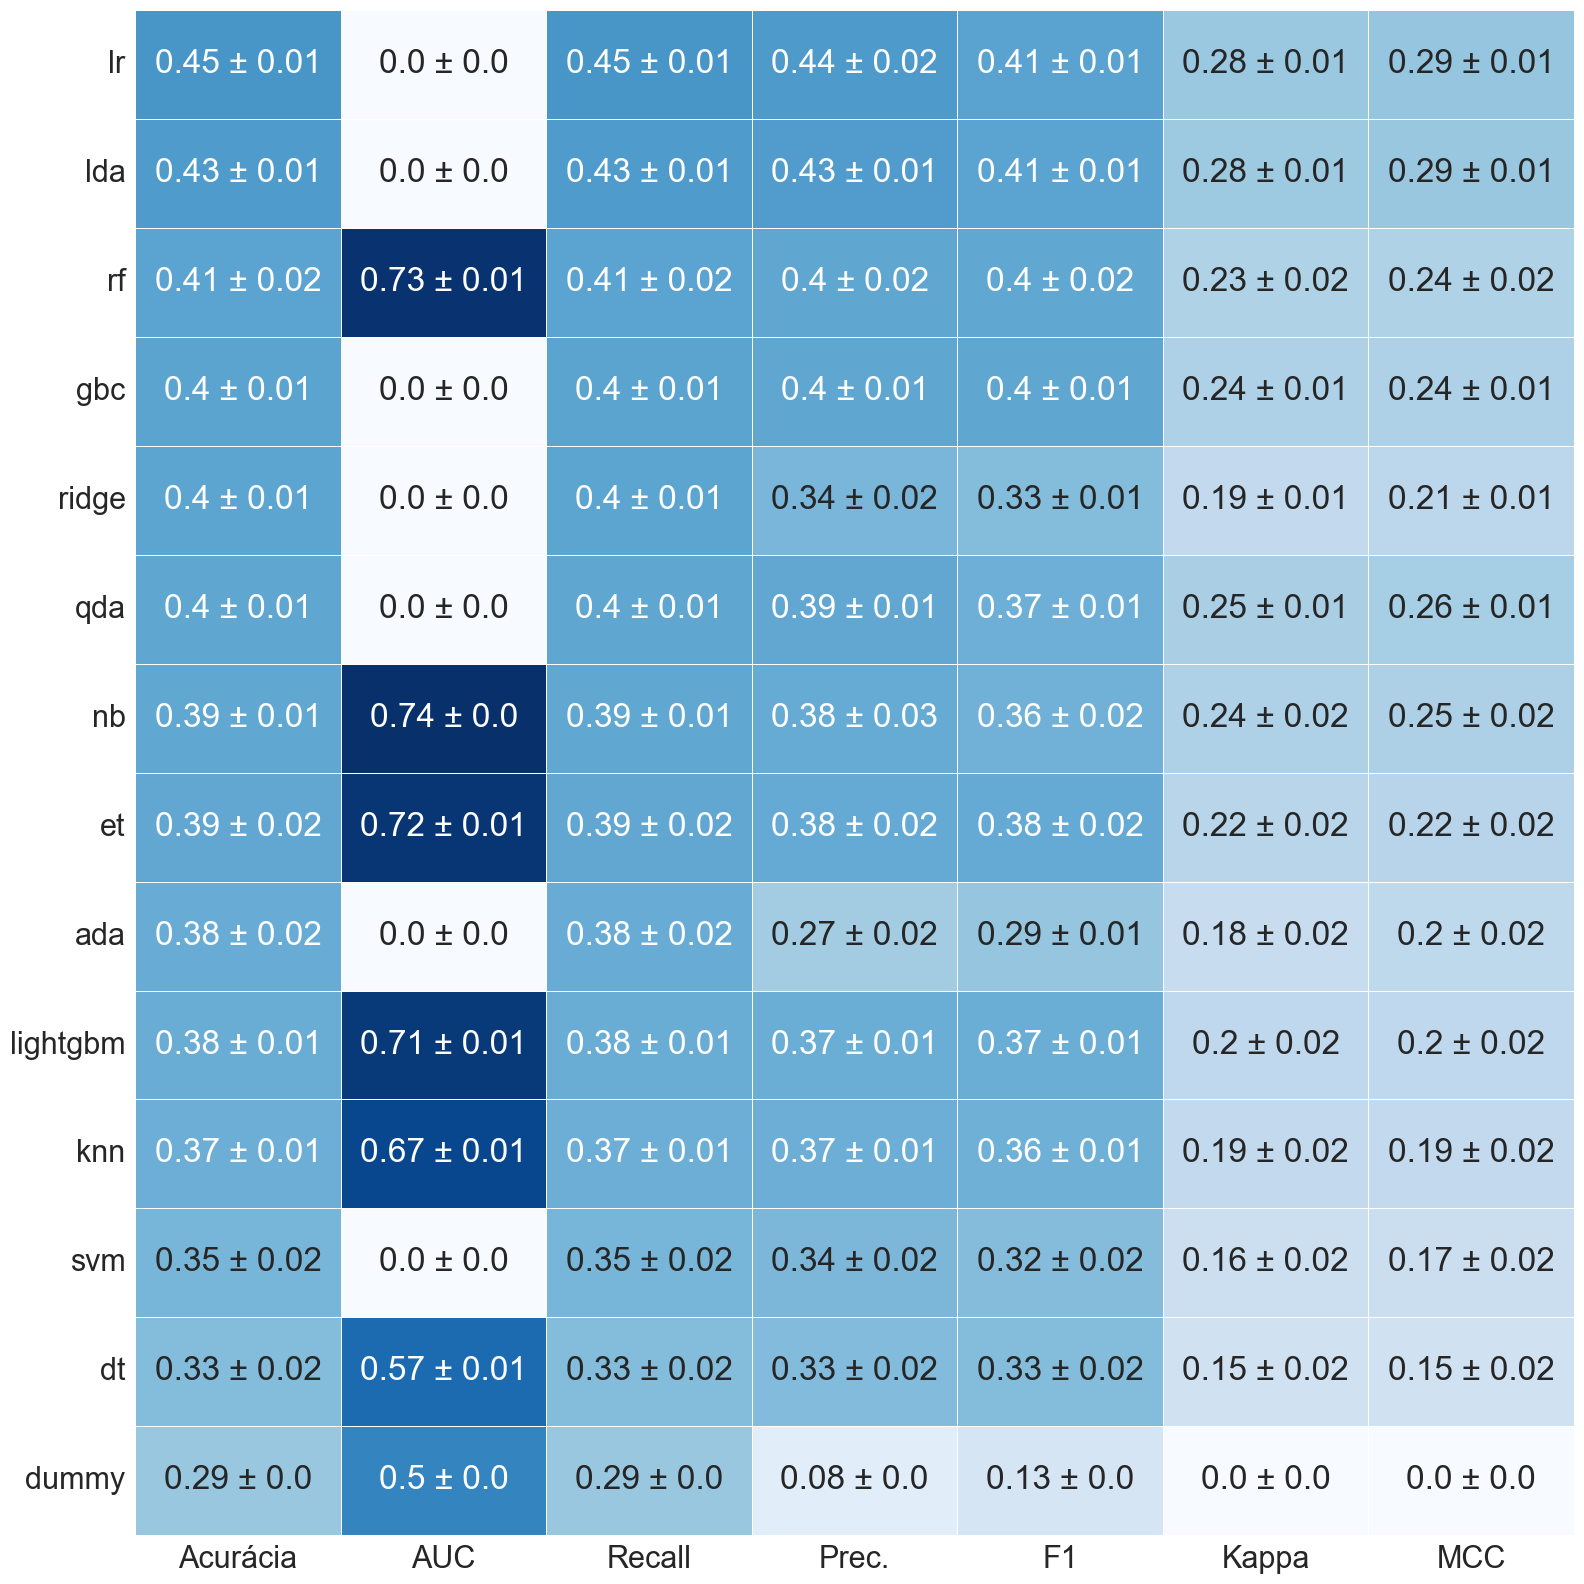

# Outros testes

In [ ]:
import pandas as pd
import 
substituicoes = {99:0,
                 'x':0,
                 'F':'f'
                 }

type_dict = {
    'data': 'datetime64[ns]',     # Datas
    'hora': 'datetime64[ns]',     # Horários
    'idade': 'Int64',             # Idades como inteiros (com suporte a NaN)
    'sexo': 'string',             # Sexo como string (categórico)
    'peso': 'Int64',            # Peso como número contínuo
    'altura': 'float64',          # Altura como número contínuo
    'vestimenta': 'string',       # Tipo de vestimenta (categórico)
    'p1': 'Int64',                 # Variáveis numéricas inteiras (suporte a NaN)
    'p2': 'Int64',
    'p3': 'Int64',
    'p4': 'Int64',
    'p5': 'Int64',
    'p6': 'Int64',
    'p7': 'Int64',
    'p8': 'Int64',
    'tev': 'float64',             # Dados contínuos
    'utci': 'float64',
    'sst': 'float64',
    'ste': 'float64',
    'psti': 'float64',
    'wbgt': 'float64',
    'wci': 'float64',
    'tek': 'float64',
    'te': 'float64',
    'pst': 'float64',
    'tmedia': 'float64',
    'tmax': 'float64',
    'tmin': 'float64',
    'tu': 'float64',
    'ur': 'float64',              # Umidade relativa
    'ur_max': 'float64',          # Umidade relativa máxima
    'ur_min': 'float64',          # Umidade relativa mínima
    'rsolarmed': 'float64',       # Radiação solar média
    'rsolartot': 'float64',       # Radiação solar total
    'vel_vento': 'float64',       # Velocidade do vento
    'dir_vento': 'float64',       # Direção do vento
    'sd_dirvento': 'float64',     # Desvio padrão da direção do vento
    'vel_vento_max': 'float64',   # Velocidade máxima do vento
    'dir_max_vento': 'float64',   # Direção máxima do vento
    'chuva_tot': 'float64'        # Total de chuva
}

df_bruto= df.copy()
from clearml.automation import PipelineDecorator
PipelineDecorator.run_locally()

df_processado = pipeline_processamento(df_bruto,
                       type_dict=type_dict,
                       substituicoes=substituicoes)



# MANIPUlÇÃO DE DATASETS CLEARML


In [ ]:
# UPLOAD
upload_dataset(df, dataset_name="dados_brutos", dataset_project="Datasets", description="Dataset bruto, sem processamento"
               , tags=["conforto_termico", "santa_maria", "brasil"])

## Listar datasets

In [ ]:
# LISTAR DATASETS
lista_datasets=Dataset.list_datasets()
pd.DataFrame(lista_datasets)
import clearml


In [ ]:
# DOWNLOAD
df= download_from_clearml('a155cb8c8a7f4d89b99bd05ce70cfd41', 'dados/baixados/')

In [ ]:
from pipelines.pipeline_treinamento import *
coluna_alvo="sensacao_termica"
atributos=["sensacao_termica","idade_anos","peso_kg","altura_cm","sexo_biologico",'temperatura_media_c','umidade_relativa_percent','radiacao_solar_media_wm2']

params = {
     "data": df_processado[atributos],
     "target": coluna_alvo,
     "session_id": 42,
     "normalize": True,
     "fold": 5,
     "verbose": False,
     "html": False,
     "use_gpu": True,
     "log_experiment": False,
 }
from clearml.automation import PipelineDecorator
PipelineDecorator.run_locally()
pipeline_treinamento(atributos,coluna_alvo, params)

#e,m, r = treinar_classificacao(params)

In [ ]:
# Importe as funções do seu script de pipeline
from pipeline_de_treinamento import step_treinar_modelo, step_avaliar_e_registrar_modelo

# Suponha que 'df_processado' é seu DataFrame pronto
# df_processado = ...
df_processado = df_processado.iloc[:300]
print("--- Testando a etapa de treino ---")
try:
    # Use .__wrapped__ para chamar a função interna diretamente
    artefatos = step_treinar_modelo.__wrapped__(df_treino=df_processado)
    print("Etapa de treino funcionou. Artefatos gerados:")
    print(artefatos)

    print("\n--- Testando a etapa de avaliação ---")
    # Agora teste a segunda etapa com os artefatos da primeira
    step_avaliar_e_registrar_modelo.__wrapped__(artefatos_treino=artefatos, df_treino=df_processado)
    print("Etapa de avaliação funcionou.")

except Exception as e:
    print("\n!!! Erro encontrado durante o teste local !!!")
    # Isso imprimirá o erro real imediatamente, sem o ClearML no meio.
    raise e

# Clearml-server

In [ ]:
from clearml.backend_api.session.client import APIClient
client = APIClient()
# pegue o projeto pelo nome (ou já use o ID, se souber)
#proj = client.projects.get_all(name='teste2')[0]
projetos = client.projects.get_all()
projetos = {projeto.name:projeto.id for projeto in projetos if projeto}
print(projetos)

In [ ]:
try:
    id=projetos['conforto_termddico']   
except:
    id=client.projects.create(name='conforto_termico').id
print(id)

In [ ]:
client.projects.delete(project=proj.id, force=True)  # falha se

In [ ]:
lista_datasets=Dataset.list_datasets()
pd.DataFrame(lista_datasets)

